# Hva er en massebalanse?

Det er en beregning av hvordan massen endrer seg i et volum. Det er veldig anvendelig for å beskrive et system hvor massen endrer seg. Det kan være endringer i den totale massen eller endringer i konsentrasjon av ett stoff. Endringer i konsentrasjon kommer som regel på grunn av at massen til ett spesifikk stoff endrer seg i systemet.

# Hvordan kan vi sette opp en massebalanse?

En massebalanse kan litt forenklet forklares ved at vi beskriver hvordan massen i et volum endrer seg ved at noe strømmer ut og noe strømmer inn i volumet.
<bt>
<bt>
<center> **Endring av masse i volumet = massestrøm inn - massestrøm ut**</center>

## Massen i volumet
Dette kan beskrives på forskjellige måter, men den enkleste formen er:

\begin{align}
m = \rho V
\end{align}

Det vi kommer til å benytte i en massebalanse er et uttrykk for hvordan massen i volumet endrer seg med tiden. Da ser vi på den tidsderiverte av massen


\begin{align}
\frac{dm}{dt} = \frac{d}{dt}(\rho V)
\end{align}

Fra dette kan vi utvide for eksempel beskrivelsen av tettheten til å beskrive tettheten av et spesifikk stoff. Da kan vi multiplisere tettheten med en massefraksjon **x**

\begin{align}
\frac{dm_{stoff}}{dt} = \frac{d}{dt}(x_{stoff} \rho V)
\end{align}

Ofte kan vi bruke $x_{stoff} \rho = \rho_{stoff}$. Da regner vi med en slags tetthet som beskriver masse av et stoff per volum $\frac{m_{stoff}}{m^3}$
<bt>
Hvis vi kan anta at volumet ikke endrer seg med tiden så kan det regnes som konstant og da setter vi det på utsiden av den deriverte.

\begin{align}
\frac{d}{dt}(\rho_{stoff} V) = V \frac{d}{dt}(\rho_{stoff})
\end{align}

Andre ganger er vi opptatt av hvordan den totale massen endrer seg mens volumet også endre seg med tiden. Dette er ofte brukt når vi studerer væsker i beholdere. Da kan vi noen ganger anta at tettheten til væsken er konstant. Uttrykket for hvordan massen endrer seg med tiden er da gitt ved.

\begin{align}
\frac{d}{dt}m = \rho \frac{d}{dt}V
\end{align}

Videre kan vi uttrykke volumet som en funksjon av en høyde ved at $V = A \cdot h$. Dette kan være nyttig for å beskrive hvordan trykket i bunnen av en tank endrer seg med tiden. Trykket benyttes often også til å bestemme massestrømmen av fluider. Et eksempel på dette kommer seinere i kurset.

\begin{align}
\frac{d}{dt}m = \rho A \frac{d}{dt}h
\end{align}

## Massestrøm inn

Hvis volumet vi beskriver har en massestrømm av et fluid inn så må vi finne en korrekt beskrivelse av denne massestrømmen. Massestrømmen er en kilde til masse-endring og beskrives gjerne med det vi kaller kildemodeller. Flere detaljer om dette kommer seinere i kurset. Massestrømmen inn i volumet er ofte en funksjon av ett trykk og et utslippsareal.

\begin{align}
\dot m_{inn} = \dot V_{inn} \cdot \rho = f(P,A,...) 
\end{align}


## Massestrøm ut

På samme måte som massestrømmen inn så må vi finne en korrekt beskrivelse av en massestrøm ut. Det kommer flere detaljer om dette seinere i kurset. For ventilerte rom i bygninger er det gjerne en grei antagelse å si at konsentrasjonen av et stoff er lik i hele rommet og at massestrømmen er gitt ved en volumstrøm multiplisert med en tetthet.

\begin{align}
\dot m_{ut} = \dot V_{ut} \cdot \rho 
\end{align}

Hvis vi studerer et spesifikk stoff kan vi utvide uttrykket over til: 

\begin{align}
\dot m_{ut,stoff} = \dot V_{ut} \cdot \rho_{stoff} 
\end{align}

Volumstrømm er gitt ved et areal multiplisert med en hastighet

\begin{align}
\dot V_{ut} = u_{ut} \cdot A_{utløp}
\end{align}


## Totale massebalansen

Hvis vi setter alle de tre uttrykkene sammen vil vi få et uttrykk for massebalansen. Nå uttrykker vi det på en form hvor vi ser på tettheten av ett stoff

\begin{align}
\frac{d}{dt}\rho_{stoff} V = \dot m_{inn,stoff} - \dot m_{ut,stoff} \\
\frac{d}{dt}\rho_{stoff} = \frac{1}{V} \left( \dot m_{inn,stoff} - \dot V_{ut} \rho_{stoff} \right)
\end{align}

Nå tar vi med oss denne massebalansen og bruker den til å beregne hvordan konsentrasjonen av CO endrer seg i et rom.

# Oppsett for beregningene


Nå skal vi se på et rom i en bygning. Volumet er $1000 m³$. Det er ventilasjon som bytter ut luften i rommet. All luften byttes ut $N_t$ ganger per time. Ved et gitt tidspunkt oppstår det en lekasje av CO. Massestrømmen av CO er gitt ved $m_t$. 
<bt>
Beregningene starter som vanlig ved at vi henter inn noen pakker som vi pleier å bruke. HVis vi trenger flere så legger vi de til etterhvert som vi jobber oss gjennom problemet.

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


Så lager vi en funksjon som gir $\frac{d}{dt}\rho_{CO}$ som utput. Denne trenger vi til løseren vår.

In [19]:
def drCOdt(rCO):
    """
    rCO har enheten kg/m³
    m_t har enheter kg/s
    Q_v er volumstrømmen ut gitt i m³/s
    """
    drCOdt = 1/Vh*(m_t - Q_v*rCO)
    return drCOdt

In [20]:
Nt = 2  #antall husvolum per time
Vh = 1000 #husvolumet m³
m_t= 1e-5 #massestrøm av CO kg/s

Q_v = Vh * Nt/3600  #Volumstrøm ut m³/s


Nå fortsetter vi med å kopiere inn en vanlig løser for differentialligninger. Her bruker vi en forward Euler som er kopiert fra fysikk forelesningene.

In [21]:
a = 0; b = 12000; #tidsinterval
n = 1000  #antall tidssteg
dt = float(b-a)/n  #størrelsen på et tidssteg
rCO0 = 0  #initial konsentrasjon

rCOc = np.zeros(n+1)
Dose = np.zeros(n+1)
Probit = np.zeros(n+1)
rCOc[0] = rCO0
Dose[0] = 0

# Forward Euler
for i in range(0,len(rCOc)-1):
    #print(i)
    rCOc[i+1] = rCOc[i] + dt * drCOdt(rCOc[i])

Nå kan vi fremmestille resultatene i et plot. Starter med å lage en vektor med tidspunktene. Videre lager vi et plot.

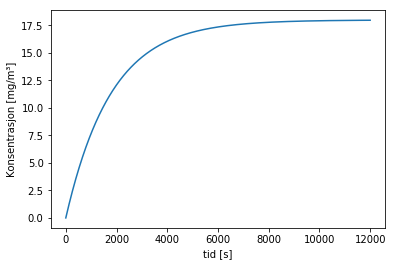

In [22]:
time = np.linspace(a,b,n+1)

plt.figure(1)
plt.clf()
plt.plot(time,rCOc*1e6)
plt.xlabel('tid [s]');
plt.ylabel('Konsentrasjon [mg/m³]');

Til å beregne konsekvensen av dette så trenger vi dosen, som er integralet at konsentrasjonen (opphøyd i en eksponent) over tid. Vi bruker data for CO og funksjonen som kummulativt summerer. Da får vi hvordan dosen endrer seg over tid. Det er forutsatt at personen som opplever denne dosen er inne i rommet helt fra starten av utslippet.
<bt>
Må gi noen innput til beregningene slik at de stemmer med hvordan dosen er beskrevet i litteraturen.

In [23]:
l  = 1 # eksponenten
Mw = 28e-3 #molmassen CO kg/mol
Rg = 8.314/Mw #gaskonstanten CO J/kg/K
T  = 300  #Temp K
p  = 101325  #Trykk Pa
C_ppm = rCOc*Rg*T/(p*Mw)*10**6

Dose=np.cumsum(C_ppm**l*dt/60)

Da kan vi fortsette og plotte dette for å se resultatet


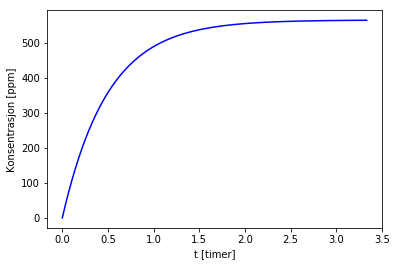

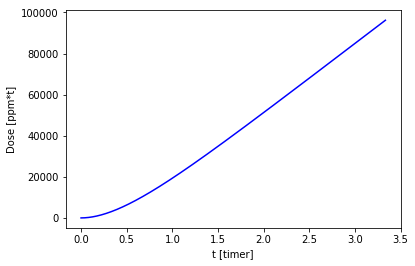

In [24]:
plt.figure(2)
plt.clf()
plt.plot(time/3600,C_ppm,'b-')
plt.xlabel('t [timer]')
plt.ylabel('Konsentrasjon [ppm]')

plt.figure(3)
plt.clf()
plt.plot(time/3600,Dose,'b-')
plt.xlabel('t [timer]');
plt.ylabel('Dose [ppm*t]');

Hvis vi regner ut et probit-verdi fra denne dosen så får vi et tall på hvor farlig dette er. Vi kan gjøre det rett om til en sansynlighet slik at vi kan bestemme den maksimale oppholdstiden i dette rommet.
<bt>
Probit-verdien vil endre seg over tiden siden dosen endrer seg over tid. Vi må hente inn funksjonen fra tidligere hvor vi regner om fra probit til prosent sansynlighet

In [25]:
def Probit2Prob(k1,k2,V):
    """
    Denne funksjonen beregner sansynlighet basert på gitte probitparametere 
    k1 og k2 samt dosen V. Pass på å bruke riktig enhet på dosen.
    """

    import numpy as np
    import math

    Y = k1 + k2 *np.log(V);
    
    P = 50.0*(1 + math.erf((Y-5)/np.sqrt(2)) )

    return P

Starter med å gi noen input til beregningene. Probit koeffisientene må gis, og så regner vi oss gjennom hele vektoren med dosene.

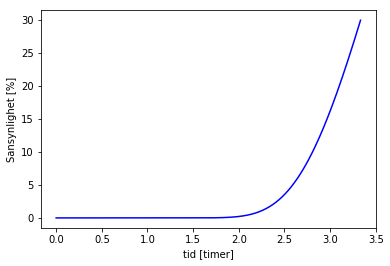

In [26]:
k1 = -37.98
k2 = 3.7
P  = np.zeros(len(Dose))
for j in range (1,len(Dose)):
    P[j] = Probit2Prob(k1,k2,Dose[j])
    
plt.figure(5)
plt.clf()
plt.plot(time/3600,P,'b-')
plt.xlabel('tid [timer]');
plt.ylabel('Sansynlighet [%]');